In [1]:
!git clone https://github.com/mubtasimahasan/reddit-comments-clustering-distilbert-pytorch.git

Cloning into 'reddit-comments-clustering-distilbert-pytorch'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 15 (delta 0), reused 15 (delta 0), pack-reused 0
Unpacking objects: 100% (15/15), 6.81 MiB | 8.54 MiB/s, done.


In [2]:
%pwd

'/kaggle/working'

In [3]:
%cd reddit-comments-clustering-distilbert-pytorch/
%pwd
%ls

/kaggle/working/reddit-comments-clustering-distilbert-pytorch
README.md  cli.py  configs/  data/  models/  requirements.txt  utils/


In [4]:
import yaml

# Define the path to the config file
config_file_path = '/kaggle/working/reddit-comments-clustering-distilbert-pytorch/configs/config.yaml'

# Open the config file for reading
with open(config_file_path, 'r') as file:
    config_data = yaml.safe_load(file)

# Update the values
config_data['report_to'] = 'wandb'
config_data['debug'] = True

# Write the updated data back to the file
with open(config_file_path, 'w') as file:
    yaml.dump(config_data, file)


In [5]:
%run cli.py

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


2024-02-29 05:29:35.035741: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-29 05:29:35.035848: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-29 05:29:35.201508: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


LookupError: 
**********************************************************************
  Resource 'corpora/wordnet' not found.  Please use the NLTK
  Downloader to obtain the resource:  >>> nltk.download()
  Searched in:
    - '/root/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************

In [6]:
# kaggle wordnet error fix
import nltk
import subprocess
try:
    nltk.data.find('wordnet.zip')
except:
    nltk.download('wordnet', download_dir='/kaggle/working/')
    command = "unzip -u /kaggle/working/corpora/wordnet.zip -d /kaggle/working/corpora"
    subprocess.run(command.split())
    nltk.data.path.append('/kaggle/working/')

[nltk_data] Downloading package wordnet to /kaggle/working/...
Archive:  /kaggle/working/corpora/wordnet.zip
   creating: /kaggle/working/corpora/wordnet/
  inflating: /kaggle/working/corpora/wordnet/lexnames  
  inflating: /kaggle/working/corpora/wordnet/data.verb  
  inflating: /kaggle/working/corpora/wordnet/index.adv  
  inflating: /kaggle/working/corpora/wordnet/adv.exc  
  inflating: /kaggle/working/corpora/wordnet/index.verb  
  inflating: /kaggle/working/corpora/wordnet/cntlist.rev  
  inflating: /kaggle/working/corpora/wordnet/data.adj  
  inflating: /kaggle/working/corpora/wordnet/index.adj  
  inflating: /kaggle/working/corpora/wordnet/LICENSE  
  inflating: /kaggle/working/corpora/wordnet/citation.bib  
  inflating: /kaggle/working/corpora/wordnet/noun.exc  
  inflating: /kaggle/working/corpora/wordnet/verb.exc  
  inflating: /kaggle/working/corpora/wordnet/README  
  inflating: /kaggle/working/corpora/wordnet/index.sense  
  inflating: /kaggle/working/corpora/wordnet/data.

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Step,Training Loss,Validation Loss,Accuracy,F1 Macro
100,1.537500,1.296091,0.565670,0.465060
200,0.972300,0.841281,0.707412,0.701354


/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Evaluation result: {'eval_loss': 0.8412805199623108, 'eval_accuracy': 0.7074122236671001, 'eval_f1_macro': 0.7013537849065282, 'eval_runtime': 6.8807, 'eval_samples_per_second': 111.763, 'eval_steps_per_second': 3.633, 'epoch': 2.53}


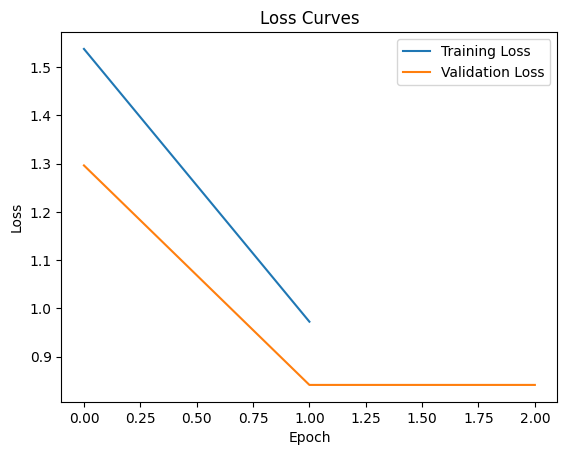

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Test set evaluation result: {'eval_loss': 0.8350910544395447, 'eval_accuracy': 0.6967071057192374, 'eval_f1_macro': 0.6897142073502636, 'eval_runtime': 5.1831, 'eval_samples_per_second': 111.323, 'eval_steps_per_second': 3.666, 'epoch': 2.53}


/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


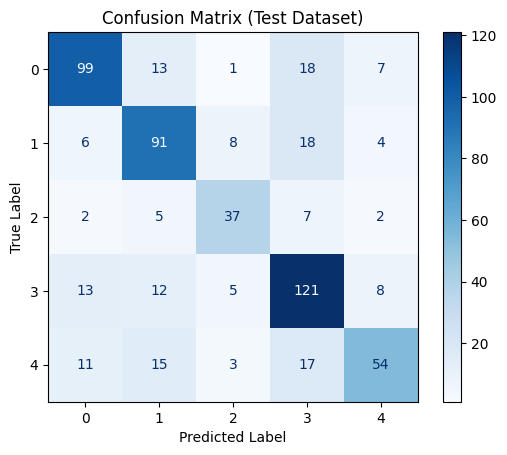

Text: hell would include retiree dont want job would include entire population kid dont shouldnt want work u total unemployed plus marginally attached worker plus total employed part time economic reason percent civilian labor force plus marginally attached workersthat everyone doesnt job want one plus everyone underemployed plus everyone underutilized everyone eligible work + arent retired
Ground Truth: 1
Predicted Class: 1
Text: cia wasnt involved cia foreign intelligence agency mentioned abuse fbi local law enforcementplease take deep breath think generalized distrust government matter well founded prove specific accusation specific part government choice happy fairy tale government best interest mind time cia dealt crack ghetto ok
Ground Truth: 1
Predicted Class: 1
Text: fat oil actually necessary anyways good try make working fun exciting idea obligation doesnt want go thats cool tell fun would fun keep positivity flowing best may need see doctor people become depressed require me

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Step,Training Loss,Validation Loss,Accuracy,F1 Macro
100,0.712800,0.688270,0.761468,0.758852
200,0.606200,0.700994,0.759939,0.753401


Checkpoint destination directory ./results/checkpoint-100 already exists and is non-empty.Saving will proceed but saved results may be invalid.
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Checkpoint destination directory ./results/checkpoint-200 already exists and is non-empty.Saving will proceed but saved results may be invalid.
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Evaluation result: {'eval_loss': 0.6882703900337219, 'eval_accuracy': 0.7614678899082569, 'eval_f1_macro': 0.7588518512155754, 'eval_runtime': 5.7566, 'eval_samples_per_second': 113.609, 'eval_steps_per_second': 3.648, 'epoch': 2.44}


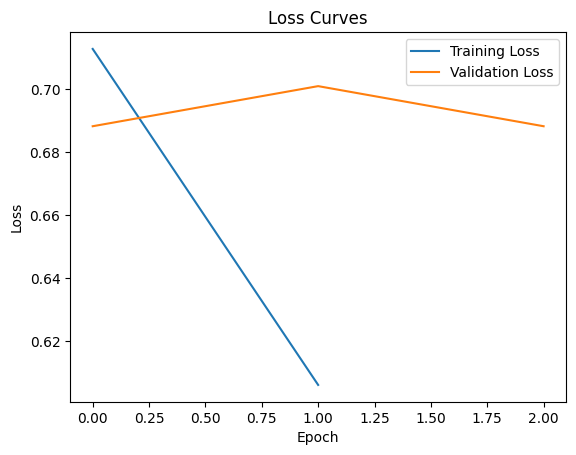

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Accuracy on validation set for fold 1: 0.7614678899082569

Fold 2/5


/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Step,Training Loss,Validation Loss,Accuracy,F1 Macro
100,0.655100,0.550306,0.830275,0.821478
200,0.583600,0.554304,0.810398,0.802746


Checkpoint destination directory ./results/checkpoint-100 already exists and is non-empty.Saving will proceed but saved results may be invalid.
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Checkpoint destination directory ./results/checkpoint-200 already exists and is non-empty.Saving will proceed but saved results may be invalid.
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Evaluation result: {'eval_loss': 0.5503062009811401, 'eval_accuracy': 0.8302752293577982, 'eval_f1_macro': 0.8214777231050524, 'eval_runtime': 5.7723, 'eval_samples_per_second': 113.3, 'eval_steps_per_second': 3.638, 'epoch': 2.44}


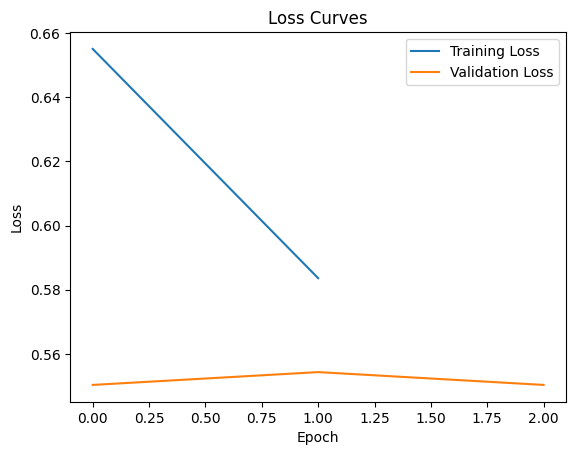

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Accuracy on validation set for fold 2: 0.8302752293577982

Fold 3/5


/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Step,Training Loss,Validation Loss,Accuracy,F1 Macro
100,0.568800,0.633509,0.779817,0.773929
200,0.512100,0.674944,0.773700,0.760393


Checkpoint destination directory ./results/checkpoint-100 already exists and is non-empty.Saving will proceed but saved results may be invalid.
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Checkpoint destination directory ./results/checkpoint-200 already exists and is non-empty.Saving will proceed but saved results may be invalid.
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Evaluation result: {'eval_loss': 0.6335093379020691, 'eval_accuracy': 0.7798165137614679, 'eval_f1_macro': 0.773929329854733, 'eval_runtime': 5.7237, 'eval_samples_per_second': 114.261, 'eval_steps_per_second': 3.669, 'epoch': 2.44}


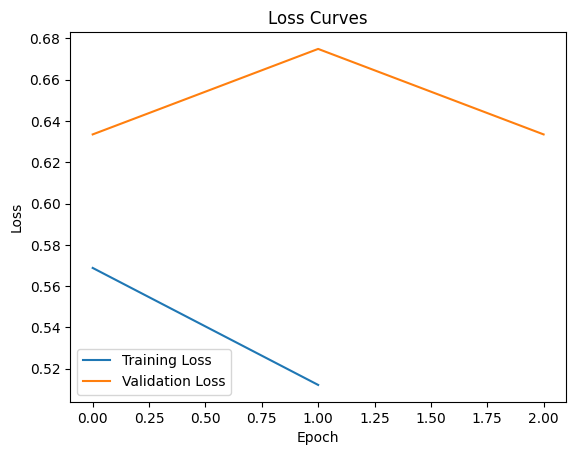

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Accuracy on validation set for fold 3: 0.7798165137614679

Fold 4/5


/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Step,Training Loss,Validation Loss,Accuracy,F1 Macro
100,0.549600,0.473782,0.842266,0.834831
200,0.474300,0.487567,0.837672,0.832962


Checkpoint destination directory ./results/checkpoint-100 already exists and is non-empty.Saving will proceed but saved results may be invalid.
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Checkpoint destination directory ./results/checkpoint-200 already exists and is non-empty.Saving will proceed but saved results may be invalid.
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Evaluation result: {'eval_loss': 0.47378236055374146, 'eval_accuracy': 0.8422664624808576, 'eval_f1_macro': 0.834830873183774, 'eval_runtime': 5.7758, 'eval_samples_per_second': 113.058, 'eval_steps_per_second': 3.636, 'epoch': 2.44}


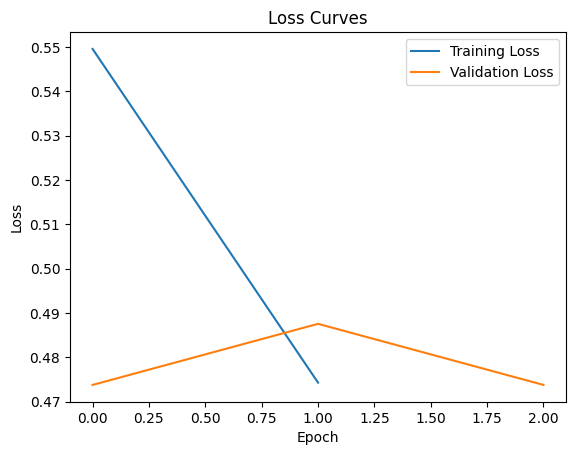

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Accuracy on validation set for fold 4: 0.8422664624808576

Fold 5/5


/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Step,Training Loss,Validation Loss,Accuracy,F1 Macro
100,0.518300,0.396570,0.882083,0.882601
200,0.433200,0.402741,0.868300,0.869293


Checkpoint destination directory ./results/checkpoint-100 already exists and is non-empty.Saving will proceed but saved results may be invalid.
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Checkpoint destination directory ./results/checkpoint-200 already exists and is non-empty.Saving will proceed but saved results may be invalid.
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Evaluation result: {'eval_loss': 0.3965698182582855, 'eval_accuracy': 0.8820826952526799, 'eval_f1_macro': 0.8826012451394061, 'eval_runtime': 5.754, 'eval_samples_per_second': 113.486, 'eval_steps_per_second': 3.65, 'epoch': 2.44}


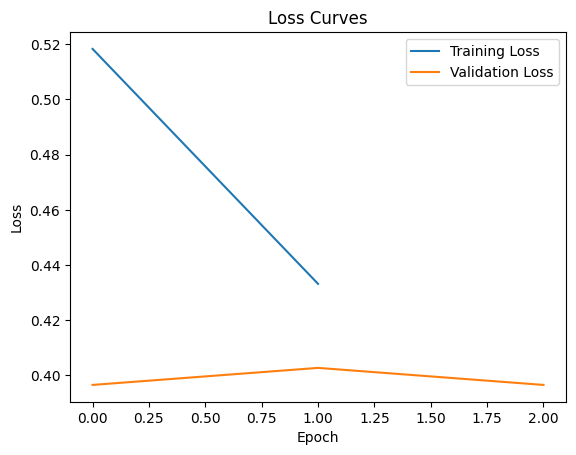

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Accuracy on validation set for fold 5: 0.8820826952526799

Average accuracy over 5 folds: 0.819181758152212


<Figure size 640x480 with 0 Axes>

In [7]:
%run cli.py